In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
img = cv2.imread("Lena_noisy.jpg",0)

In [9]:
img.shape

(225, 225)

In [10]:
img = cv2.imread("low_contrast.png", 0)
img_color = cv2.imread("scenary_lowcontrast.png")

In [5]:
cv2.imshow("Color Image",img_color)
cv2.waitKey()
cv2.destroyAllWindows()

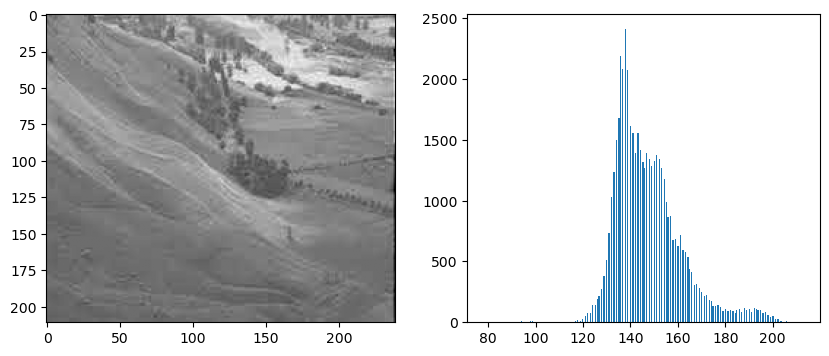

In [31]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1); plt.imshow(img, cmap = "gray")
plt.subplot(1,2,2); plt.hist(img.ravel(), 256);plt.show()

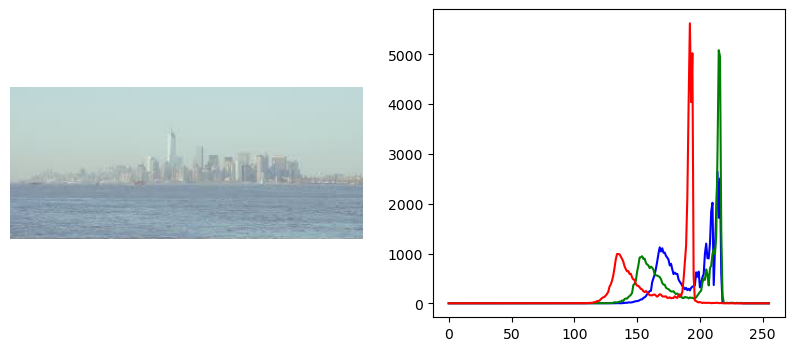

In [75]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB));plt.axis("off")
channels = ('b','g', 'r')
for i,col in enumerate(channels):
    histr = cv2.calcHist([img_color],[i],None,[256],[0,256])
    plt.subplot(1,2,2); plt.plot(histr, color = col)
plt.show()

In [49]:
img_enhanced = cv2.equalizeHist(img)

In [67]:
b = img_color[:,:,0]

In [68]:
b.shape

(142, 329)

In [69]:
g = img_color[:,:,1]
r = img_color[:,:,2]

In [70]:
b_enh = cv2.equalizeHist(b)
g_enh = cv2.equalizeHist(g)
r_enh = cv2.equalizeHist(r)

In [71]:
color_enh = cv2.merge([b_enh,g_enh,r_enh])

In [63]:
cv2.imshow("original image", img_color)
cv2.imshow("Enhanced Image", color_enh)
cv2.waitKey()
cv2.destroyAllWindows()

In [64]:
# Convert to YCrCb color space
ycrcb = cv2.cvtColor(img_color, cv2.COLOR_BGR2YCrCb)

# Split channels
y, cr, cb = cv2.split(ycrcb)

# Equalize only the Y channel (luminance)
y_eq = cv2.equalizeHist(y)

# Merge back
ycrcb_eq = cv2.merge([y_eq, cr, cb])

# Convert back to BGR
color_enh = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)


In [76]:
cv2.imshow("original image", img_color)
cv2.imshow("Enhanced Image", color_enh)
cv2.waitKey()
cv2.destroyAllWindows()

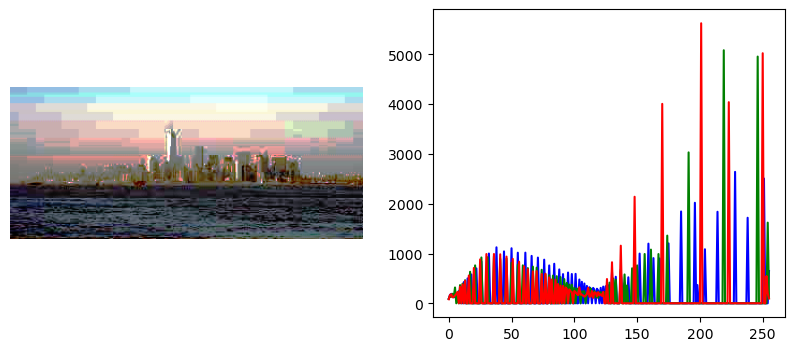

In [73]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(color_enh,cv2.COLOR_BGR2RGB));plt.axis("off")
channels = ('b','g', 'r')
for i,col in enumerate(channels):
    histr = cv2.calcHist([color_enh],[i],None,[256],[0,256])
    plt.subplot(1,2,2); plt.plot(histr, color = col)
plt.show()

In [6]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img)

In [7]:
cv2.imshow("original image", img)
cv2.imshow("CLAHE Image", img_clahe)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image in grayscale
img = cv2.imread("pseudoku.png", cv2.IMREAD_GRAYSCALE)

# Get min and max pixel values
min_val = np.min(img)
max_val = np.max(img)

print("Before stretching: min =", min_val, "max =", max_val)

# Contrast stretching: scale to 0–255
stretched = (img - min_val) * (255.0 / (max_val - min_val))
stretched = stretched.astype(np.uint8)

print("After stretching: min =", np.min(stretched), "max =", np.max(stretched))

# Display results
plt.subplot(1,2,1); plt.imshow(img, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(stretched, cmap="gray"); plt.title("Contrast Stretched"); plt.axis("off")
plt.show()
